# Movie recommendation System with Machine Learning

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')
import base64
import io
from matplotlib.pyplot import imread
import codecs
from IPython.display import HTML
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# from google.colab import drive #Uncomment if loading from Google Drive
# drive.mount('/content/drive',force_remount=True) 
print("Libraries loaded successfully!")

Libraries loaded successfully!


In [290]:
#Loading the dataset
movies_path = "C:/Users/n/Downloads/tmdb_5000_movies.csv"
credits_path = "C:/Users/n/Downloads/tmdb_5000_credits.csv"

movies = pd.read_csv(movies_path)

credits = pd.read_csv(credits_path)

# movies_path = "/content/drive/MyDrive/Colab Notebooks/movies.csv"   #Uncomment if loading from Google Drive
# credits_path = "/content/drive/MyDrive/Colab Notebooks/credits.csv" #Uncomment if loading from Google Drive

# movies = pd.read_csv(movies_path) #Uncomment if loading from Google Drive
# credits = pd.read_csv(credits_path) #Uncomment if loading from Google Drive
print("Loaded successfully!")

Loaded successfully!


# **Data exploration and preprocessing**

In [291]:
#Visualize the first five elements of the Movies Dataset
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [292]:
#Visualize the last five elements of the Movies Dataset
movies.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


In [293]:
#Display the statistical summarry of the Movies dataset 
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [294]:
#Data types for the movies Dataset
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [295]:
#Visualize the first five elements of the Credits Dataset
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [296]:
#Visualize the last five elements of the Dataset
credits.tail()

,movie_id,title,cast,crew
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."
4802,25975,My Date with Drew,"[{""cast_id"": 3, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""58ce021b9251415a390165d9"", ""de..."


In [297]:
#Provide the statistical summary of the dataset
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [298]:
#Visualize the Data types of the credits dataset
credits.dtypes

movie_id     int64
title       object
cast        object
crew        object
dtype: object

In [299]:
#Check for missing values in movies dataset
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [300]:
# Handle missing values
num_features = ['popularity', 'runtime', 'vote_count']

movies[num_features] = movies[num_features].fillna(movies[num_features].mean())
print(movies[num_features])

      popularity  runtime  vote_count
0     150.437577    162.0       11800
1     139.082615    169.0        4500
2     107.376788    148.0        4466
3     112.312950    165.0        9106
4      43.926995    132.0        2124
...          ...      ...         ...
4798   14.269792     81.0         238
4799    0.642552     85.0           5
4800    1.444476    120.0           6
4801    0.857008     98.0           7
4802    1.929883     90.0          16

[4803 rows x 3 columns]


In [301]:
#Check for missing values in credits dataset
print(credits.isnull().sum())
print("\nNo missing values so no need to remove or replace any missing values in the credit dataset")

movie_id    0
title       0
cast        0
crew        0
dtype: int64

No missing values so no need to remove or replace any missing values in the credit dataset


In [302]:
# dataframe.size
size = movies.size
# dataframe.shape
shape = movies.shape
# printing size and shape
print("Size = {}\nShape = {}".format(size, shape))
print('Cols: ', movies.shape[1])

Size = 96060
Shape = (4803, 20)
Cols:  20


In [303]:
# Get the movies dataset data features.
features =  movies.columns
features = features[0:13]
print(features)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue'],
      dtype='object')


In [304]:
# Get the classes of the movies data.
dclass = movies['original_title']
dclass = dclass.unique()
print(dclass)

['Avatar' "Pirates of the Caribbean: At World's End" 'Spectre' ...
 'Signed, Sealed, Delivered' 'Shanghai Calling' 'My Date with Drew']


In [305]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Standardize numerical features

In [306]:
# Handle missing values
movies[num_features] = movies[num_features].fillna(movies[num_features].mean())

# Standardize numerical features
scaler = StandardScaler()
movies[num_features] = scaler.fit_transform(movies[num_features])
print("The Standardize numerical features are:\n ",movies[num_features])

The Standardize numerical features are:
        popularity   runtime  vote_count
0       4.053183  2.438596    8.999729
1       3.696258  2.748263    3.086200
2       2.699638  1.819260    3.058657
3       2.854798  2.571310    6.817394
4       0.705198  1.111448    1.161467
...          ...       ...         ...
4798   -0.227028 -1.144703   -0.366329
4799   -0.655378 -0.967750   -0.555076
4800   -0.630170  0.580589   -0.554266
4801   -0.648637 -0.392652   -0.553456
4802   -0.614912 -0.746559   -0.546165

[4803 rows x 3 columns]


Feature selection

In [307]:
# Feature selection
selector = SelectKBest(f_classif, k='all')
selected_features = selector.fit_transform(movies[num_features], movies['vote_average'])

selector = SelectKBest(f_classif, k=3)
selected_features = selector.fit_transform(movies[num_features], movies['vote_average'])

# Print the selected features after feature selection
print(f'Selected Features after Feature Selection: {selected_features.shape[1]}')

Selected Features after Feature Selection: 3


Normalize and standardize features

In [308]:
# Normalize and standardize features
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

normalized_features = scaler_minmax.fit_transform(selected_features)
standardized_features = scaler_standard.fit_transform(selected_features)

# Print the selected features after feature selection
print(f'Selected Features after Feature Selection: {selected_features.shape[1]}')

# Print the normalized and standardized features
print(f'Normalized Features Shape: {normalized_features.shape}')
print(f'Standardized Features Shape: {standardized_features.shape}')

Selected Features after Feature Selection: 3
Normalized Features Shape: (4803, 3)
Standardized Features Shape: (4803, 3)


PCA for dimensionality reduction


PCA for dimensionality reduction are:  [[ 9.51361222 -0.87819631]
 [ 5.46013705  0.81721078]
 [ 4.45519835  0.24422867]
 ...
 [-0.5724318   0.84464378]
 [-0.93384598 -0.05726017]
 [-1.0341357  -0.39840342]]
Explained Variance Ratio: [0.63787567 0.28868105]


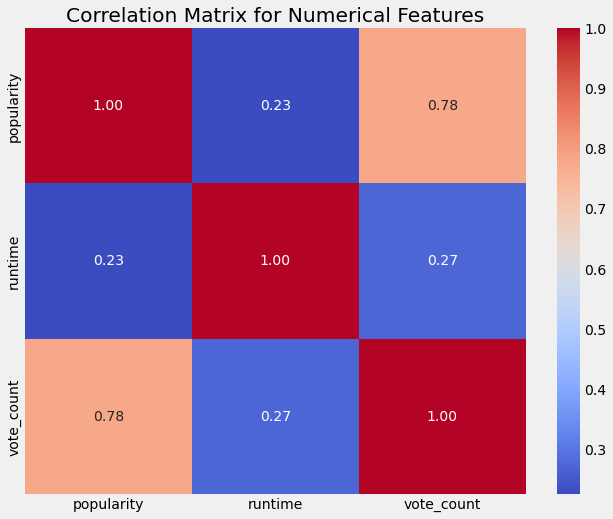

In [310]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
movies_pca = pca.fit_transform(movies[num_features])
print("\nPCA for dimensionality reduction are: ",movies_pca )

# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

# Heatmap for most correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(movies[num_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()


Finding outliers

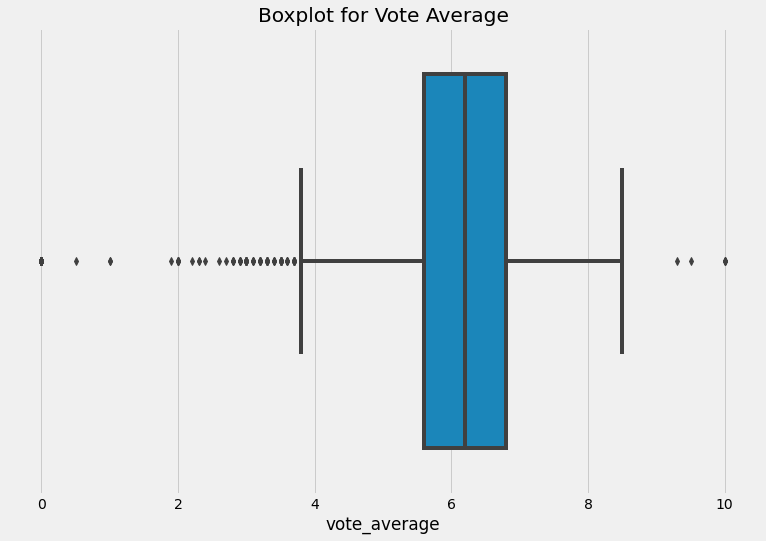

In [311]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(x=movies['vote_average'])
plt.title('Boxplot for Vote Average')
plt.show()

# Explatory Data Analysis(EDA) and Visualization

Histplot

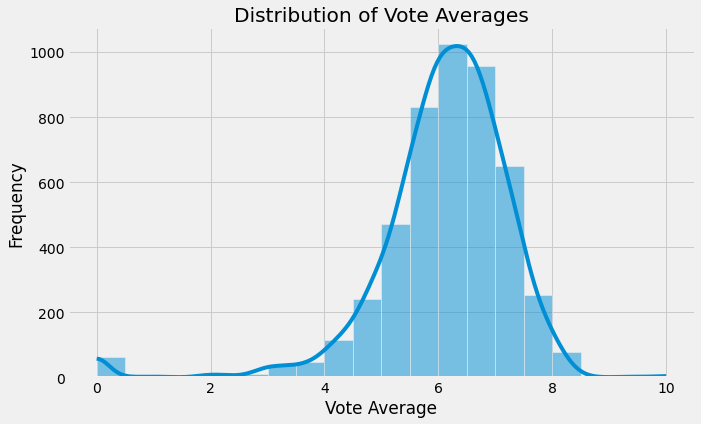

In [312]:
# Visualize the distribution of 'vote_average'
plt.figure(figsize=(10, 6))
sns.histplot(movies['vote_average'], bins=20, kde=True)
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()


Correlation matrix

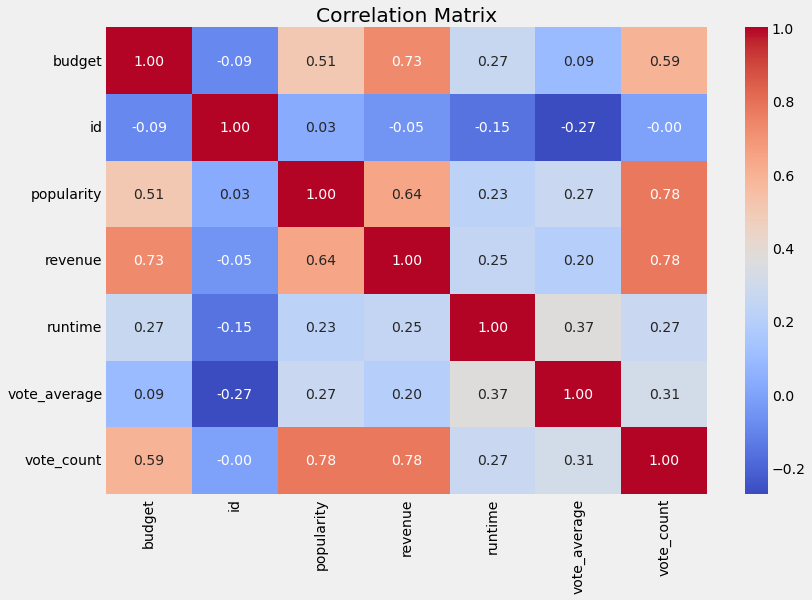

In [313]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(movies.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Histogram

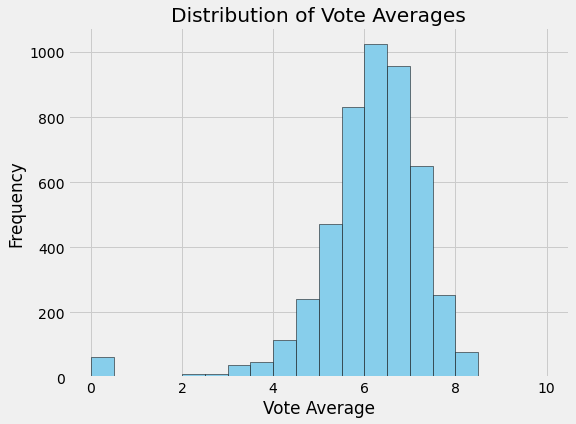

In [314]:
# Histogram for 'vote_average'
plt.figure(figsize=(8, 6))
plt.hist(movies['vote_average'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()


Scatterplot

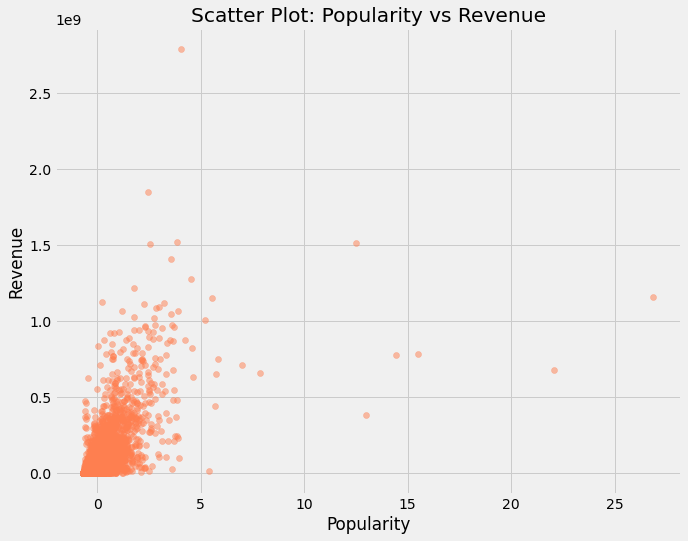

In [315]:
# Scatter plot between 'popularity' and 'revenue'
plt.figure(figsize=(10, 8))
plt.scatter(movies['popularity'], movies['revenue'], color='coral', alpha=0.5)
plt.title('Scatter Plot: Popularity vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()


PieChart

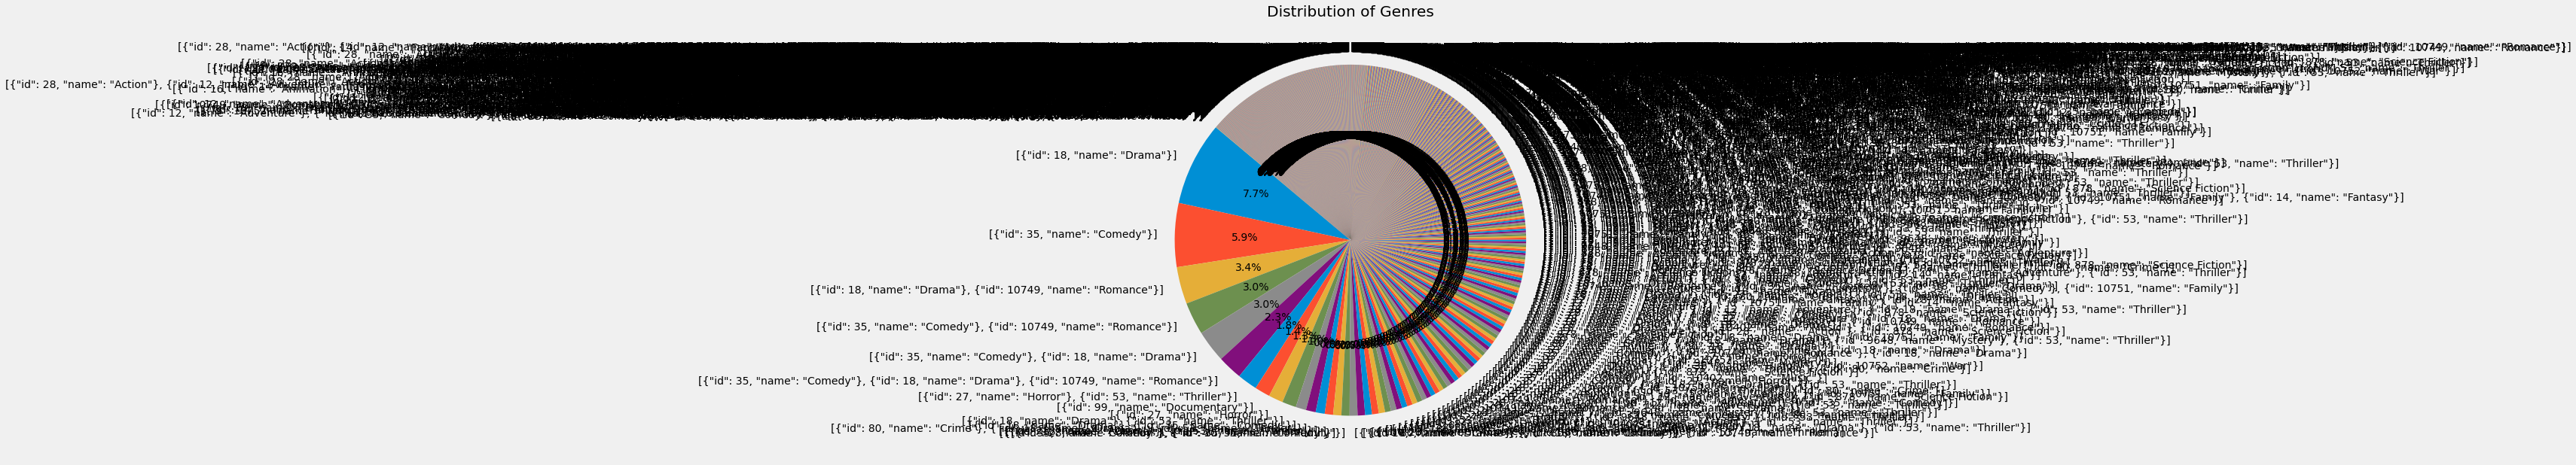

In [316]:
# Pie chart for the distribution of genres
genre_counts = movies['genres'].explode().value_counts()
plt.figure(figsize=(10, 10))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Genres')
plt.show()

Boxplot

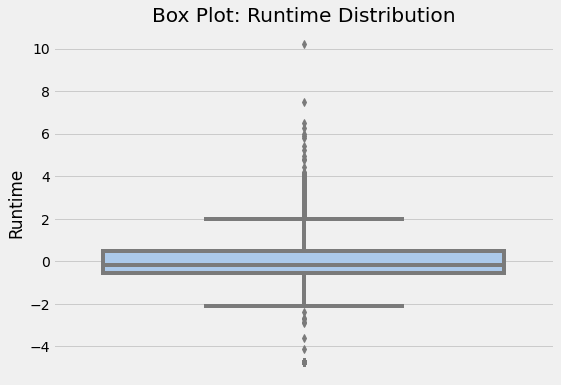

In [317]:
# Box plot for 'runtime' distribution
plt.figure(figsize=(8, 6))
sns.boxplot(y='runtime', data=movies, palette='pastel')
plt.title('Box Plot: Runtime Distribution')
plt.ylabel('Runtime')
plt.show()


HeatMap

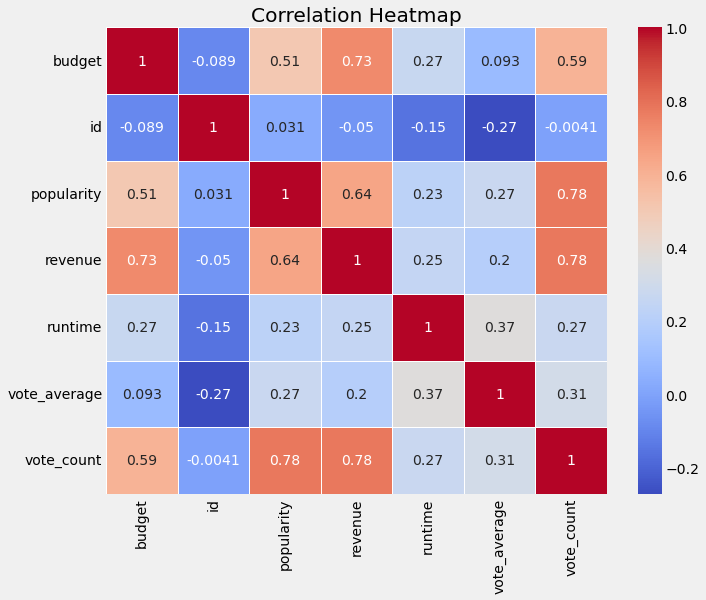

In [318]:
# Heatmap for correlation matrix
correlation_matrix = movies.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


# ML algorithms

1. Random Forest

In [319]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Sample feature selection (you may need to adjust this based on your specific features)
features = ['popularity', 'runtime', 'vote_count']

# Prepare data
X = movies[features]
y = movies['vote_average']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
m_accuracy=(mse*100)
accuracy = round(m_accuracy, 2)
print(f'The Mean Squared Error (MSE) is: {mse}')
# print(f"Random Forest RMSE: {rf_rmse}")
print(f'The Model Accuracy is: {accuracy} %')


The Mean Squared Error (MSE) is: 0.7974552580645161
The Model Accuracy is: 79.75 %


2. Support Vector Machines (SVM)

In [320]:
# SVM

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Split the data into features and target variable
X = movies[num_features].values
y = movies['vote_average'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)

accuracy = round(accuracy, 2)

# Evaluate the models
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
m_accuracy=(svm_rmse*100)
accuracy = round(m_accuracy, 2)
print(f"SVM RMSE: {svm_rmse}")
print(f'The Model Accuracy is: {accuracy} %')

SVM RMSE: 1.1023987132004434
The Model Accuracy is: 110.24 %


3. Gradient Boosting algorithm

In [321]:
# !pip install xgboost   #Uncomment to install in your machine

In [322]:
#Check on the movies columns
print(movies.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [323]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Convert 'genres_bin' to one-hot encoded columns
genres_dummies = movies['genres'].apply(pd.Series)

# Concatenate the new one-hot encoded columns to the original dataframe
movies_encoded = pd.concat([movies, genres_dummies], axis=1)

# Drop the original 'genres_bin' column
movies_encoded = movies_encoded.drop('genres', axis=1)

# Drop any remaining non-numeric columns
movies_encoded = movies_encoded.select_dtypes(include=['number'])

# Extract features and target variable
X = movies_encoded.drop('vote_average', axis=1)
y = movies_encoded['vote_average']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingRegressor
gradient_boosting = GradientBoostingRegressor()

# Train the model
gradient_boosting.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradient_boosting.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
m_accuracy=(mse*100)
accuracy = round(m_accuracy, 2)
print(f'Gradient Boosting algorithm Mean Squared Error: {mse}')
print(f'The Model Accuracy is: {accuracy} %')

Gradient Boosting algorithm Mean Squared Error: 0.5571103322485422
The Model Accuracy is: 55.71 %


In [324]:
#Loading the dataset
movies_path = "C:/Users/n/Downloads/tmdb_5000_movies.csv"
credits_path = "C:/Users/n/Downloads/tmdb_5000_credits.csv"

movies = pd.read_csv(movies_path)

credits = pd.read_csv(credits_path)
print("Datasets loaded successfully!")

Datasets loaded successfully!


In [325]:
movies = movies.merge(credits,left_on='id',right_on='movie_id',how='left')
print("Merged successfully!")

Merged successfully!


In [326]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

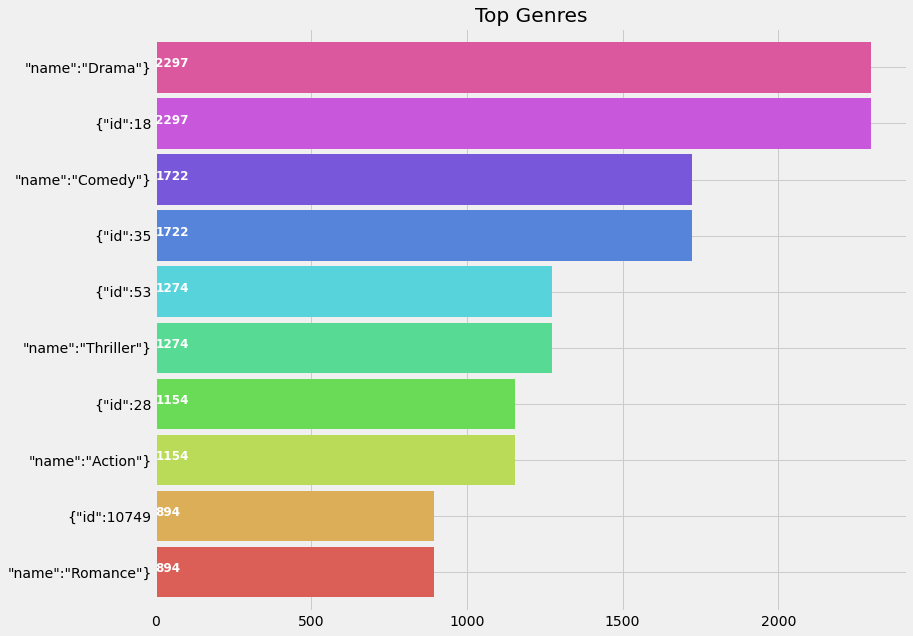

In [327]:
plt.subplots(figsize=(12,10))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values):
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [328]:
for i,j in zip(movies['genres'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'genres']=str(list2)
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

In [329]:
genreList = []
for index, row in movies.iterrows():
    genres = row["genres"]

    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10] #now we have a list with unique genres

['"name":"Action"}',
 '"name":"Adventure"}',
 '"name":"Fantasy"}',
 '"name":"ScienceFiction"}',
 '{"id":12',
 '{"id":14',
 '{"id":28',
 '{"id":878',
 '"name":"Crime"}',
 '{"id":80']

In [330]:
def binary(genre_list):
    binaryList = []

    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)

    return binaryList

In [331]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))
movies['genres_bin'].head()

0    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, ...
4    [1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

In [333]:
#Loading the dataset
movies_path = "C:/Users/n/Downloads/tmdb_5000_movies.csv"
credits_path = "C:/Users/n/Downloads/tmdb_5000_credits.csv"

movies = pd.read_csv(movies_path)

credits = pd.read_csv(credits_path)


In [334]:
movies = movies.merge(credits,left_on='id',right_on='movie_id',how='left')

In [335]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title_x                  object
vote_average            float64
vote_count                int64
movie_id                  int64
title_y                  object
cast                     object
crew                     object
dtype: object

In [336]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

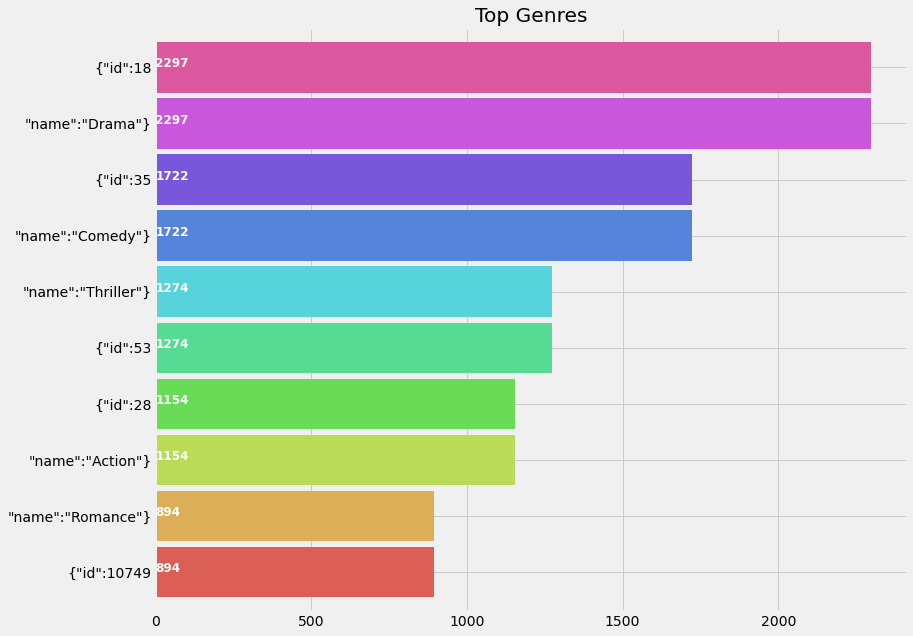

In [349]:
plt.subplots(figsize=(12,10))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values):
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()



In [338]:
for i,j in zip(movies['genres'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'genres']=str(list2)
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

In [339]:
genreList = []
for index, row in movies.iterrows():
    genres = row["genres"]

    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10] #now we have a list with unique genres

['"name":"Action"}',
 '"name":"Adventure"}',
 '"name":"Fantasy"}',
 '"name":"ScienceFiction"}',
 '{"id":12',
 '{"id":14',
 '{"id":28',
 '{"id":878',
 '"name":"Crime"}',
 '{"id":80']

In [340]:
def binary(genre_list):
    binaryList = []

    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)

    return binaryList

In [341]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))
movies['genres_bin'].head()

0    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, ...
4    [1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

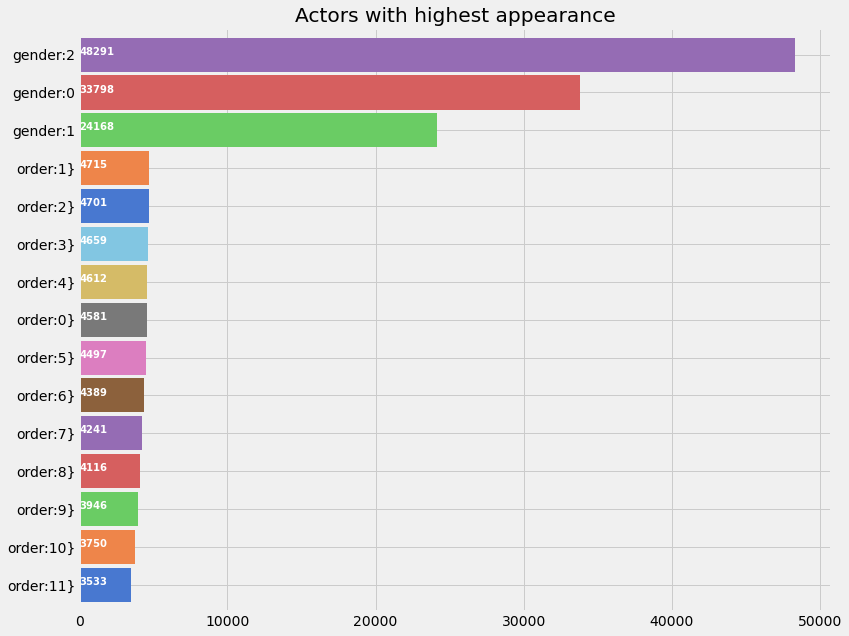

In [342]:
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['cast'] = movies['cast'].str.split(',')
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values):
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Actors with highest appearance')
plt.show()

In [343]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]

    genresA = a['genres_bin']
    genresB = b['genres_bin']

    genreDistance = spatial.distance.cosine(genresA, genresB)

    # scoreA = a['cast_bin']
    # scoreB = b['cast_bin']
    # scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    return genreDistance

In [344]:
new_id = list(range(0,movies.shape[0]))
movies['new_id']=new_id
movies=movies[['original_title','genres','vote_average','genres_bin','new_id']]
movies.head()

,original_title,genres,vote_average,genres_bin,new_id
0,Avatar,"[""name"":""Action""}, ""name"":""Adventure""}, ""name""...",7.2,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",0
1,Pirates of the Caribbean: At World's End,"[""name"":""Action""}, ""name"":""Adventure""}, ""name""...",6.9,"[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,Spectre,"[""name"":""Action""}, ""name"":""Adventure""}, ""name""...",6.3,"[1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...",2
3,The Dark Knight Rises,"[""name"":""Action""}, ""name"":""Crime""}, ""name"":""Dr...",7.6,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, ...",3
4,John Carter,"[""name"":""Action""}, ""name"":""Adventure""}, ""name""...",6.1,"[1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",4


In [345]:
import operator

def predict_score(name):
    #name = input('Enter a movie title: ')
    new_movie = movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.original_title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []

        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))

        distances.sort(key=operator.itemgetter(1))
        neighbors = []

        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)

    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+movies.iloc[neighbor[0]][2]
        print( movies.iloc[neighbor[0]][0]+" | Genres: "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][2]))

    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_movie['original_title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']))

In [346]:
predict_score('Iron Man')

Selected Movie:  Iron Man 3

Recommended Movies: 

John Carter | Genres: '"name":"Action"}','"name":"Adventure"}','"name":"ScienceFiction"}','{"id":12','{"id":28','{"id":878' | Rating: 6.1
Avengers: Age of Ultron | Genres: '"name":"Action"}','"name":"Adventure"}','"name":"ScienceFiction"}','{"id":12','{"id":28','{"id":878' | Rating: 7.3
The Avengers | Genres: '"name":"Action"}','"name":"Adventure"}','"name":"ScienceFiction"}','{"id":12','{"id":28','{"id":878' | Rating: 7.4
Captain America: Civil War | Genres: '"name":"Action"}','"name":"Adventure"}','"name":"ScienceFiction"}','{"id":12','{"id":28','{"id":878' | Rating: 7.1
Transformers: Revenge of the Fallen | Genres: '"name":"Action"}','"name":"Adventure"}','"name":"ScienceFiction"}','{"id":12','{"id":28','{"id":878' | Rating: 6.0
Transformers: Age of Extinction | Genres: '"name":"Action"}','"name":"Adventure"}','"name":"ScienceFiction"}','{"id":12','{"id":28','{"id":878' | Rating: 5.8
TRON: Legacy | Genres: '"name":"Action"}','"name"

In [218]:
#THE END